Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [2]:
import pandas as pd
df=pd.read_csv("../Data/Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
import numpy as np

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
df['Age'].isnull().sum()

177

In [11]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [12]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [13]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=1)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [14]:
median=df.Age.median()

In [15]:
median

28.0

In [16]:
impute_nan(df,"Age",median)

In [17]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

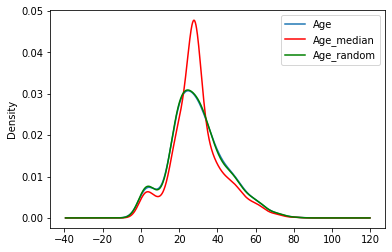

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Advantages
Easy To implement
There is less distortion in variance
Disadvantage
Every situation randomness wont work
Capturing NAN values with a new feature
It works well if the data are not missing completely at random

## 3) Capturing NAN values with a new feature

THIS TECHNIUE WILL WORK WELL IF DATA IS NOT COMPLETLEY MISSING AT RANDOM MEANS THERE WILL BE RELATION BETWEEN MISIING DATA

In [21]:
df=pd.read_csv("../Data/Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df['AGE_NAN']=np.where(df['Age'].isnull(),1,0)

In [24]:
df.head()

,Survived,Age,Fare,AGE_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


dvantages
Easy to implement
Captures the importance of missing values
Disadvantages
Creating Additional Features(Curse of Dimensionality)

## END OF DISTRIBUTION IMPUTATION

In [25]:
df=pd.read_csv("../Data/Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot: >

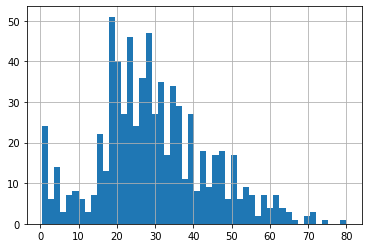

In [26]:
df.Age.hist(bins=50)

In [31]:
extreme=df.Age.mean()+3*df.Age.std()

<AxesSubplot: xlabel='Age'>

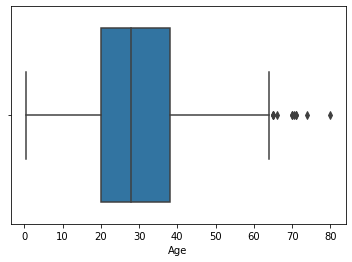

In [30]:
import seaborn as sns
sns.boxplot(x='Age',data=df)

In [32]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [33]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [34]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot: >

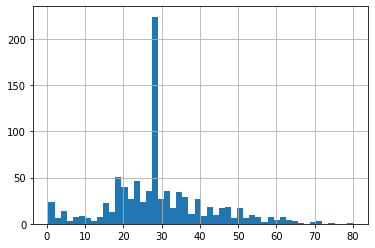

In [35]:
df['Age'].hist(bins=50)

<AxesSubplot: >

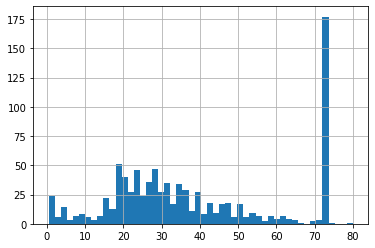

In [36]:
df['Age_end_distribution'].hist(bins=50)

<AxesSubplot: xlabel='Age_end_distribution'>

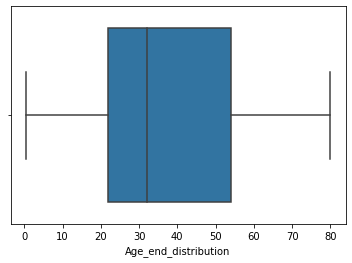

In [37]:
sns.boxplot(x="Age_end_distribution",data=df)

## Advantages

- Easy To Implement
- Captures the importance of missing values if there is one

## DisAdvantages

- Distrots the original distribution of the variables
- Also create in predictive power of original variable
- If big number NA avliable it will become outliear in the distribution
- If small number is NA replaced NA will become outliear